In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":12,
    "n_white_vehicle":2,
    "n_white_drone":1},
    "init":"SE"
  },

  "blacks":{
    "params":{
    "n_black_infantry":12,
    "n_black_vehicle":2,
    "n_black_drone":1},
    "init":"NW"
  }
}

In [3]:
from plato.objective.temporal.control_objective import ControlObjective
objectives = [ControlObjective(interval=[24,84], area={'xy':[20,70],'radius':4})]

In [4]:
sim = Environment(config, shape=(100,100), objectives=objectives, time_limit=96)

In [5]:
obs = sim.reset()

In [6]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

ATLANTA       <plato.entity.infantry.Infantry object at 0x11a1d3710>
HOPE          <plato.entity.infantry.Infantry object at 0x11a1d3a50>
TOKYO         <plato.entity.infantry.Infantry object at 0x11a1d94d0>
PHOENIX       <plato.entity.infantry.Infantry object at 0x11a1d9f90>
ECHO          <plato.entity.infantry.Infantry object at 0x11a1dba90>
IPSWICH       <plato.entity.infantry.Infantry object at 0x11a1d7590>
WHISKEY       <plato.entity.infantry.Infantry object at 0x11a1e1090>
LITTLEROCK    <plato.entity.infantry.Infantry object at 0x11a1e1b50>
MAHAN         <plato.entity.infantry.Infantry object at 0x11a1e2650>
TOMBSTONE     <plato.entity.infantry.Infantry object at 0x11a1e3150>
HONOLULU      <plato.entity.infantry.Infantry object at 0x11a1e0750>
SIERRA        <plato.entity.infantry.Infantry object at 0x11a1c8690>
URBANA        <plato.entity.vehicle.Vehicle object at 0x11a1e3c10>
SIOUXCITY     <plato.entity.vehicle.Vehicle object at 0x11a0e8d50>
BOUGANSVILLE  <plato.entity.drone.Dron

In [7]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x11a1e8b90>
unknown_1     <plato.entity.infantry.Infantry object at 0x11a1e8bd0>
unknown_2     <plato.entity.infantry.Infantry object at 0x11a1ec6d0>
unknown_3     <plato.entity.infantry.Infantry object at 0x11a1ee1d0>
unknown_4     <plato.entity.infantry.Infantry object at 0x11a1eec90>
unknown_5     <plato.entity.infantry.Infantry object at 0x11a1ef790>
unknown_6     <plato.entity.infantry.Infantry object at 0x11a1f1290>
unknown_7     <plato.entity.infantry.Infantry object at 0x11a1f1d50>
unknown_8     <plato.entity.infantry.Infantry object at 0x11a1f4850>
unknown_9     <plato.entity.infantry.Infantry object at 0x11a1f6350>
unknown_10    <plato.entity.infantry.Infantry object at 0x11a1f7950>
unknown_11    <plato.entity.infantry.Infantry object at 0x11a1f7990>
unknown_12    <plato.entity.vehicle.Vehicle object at 0x11a1f7910>
unknown_13    <plato.entity.vehicle.Vehicle object at 0x11a1fb750>
unknown_14    <plato.entity.drone.Dron

In [8]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 100, 100)

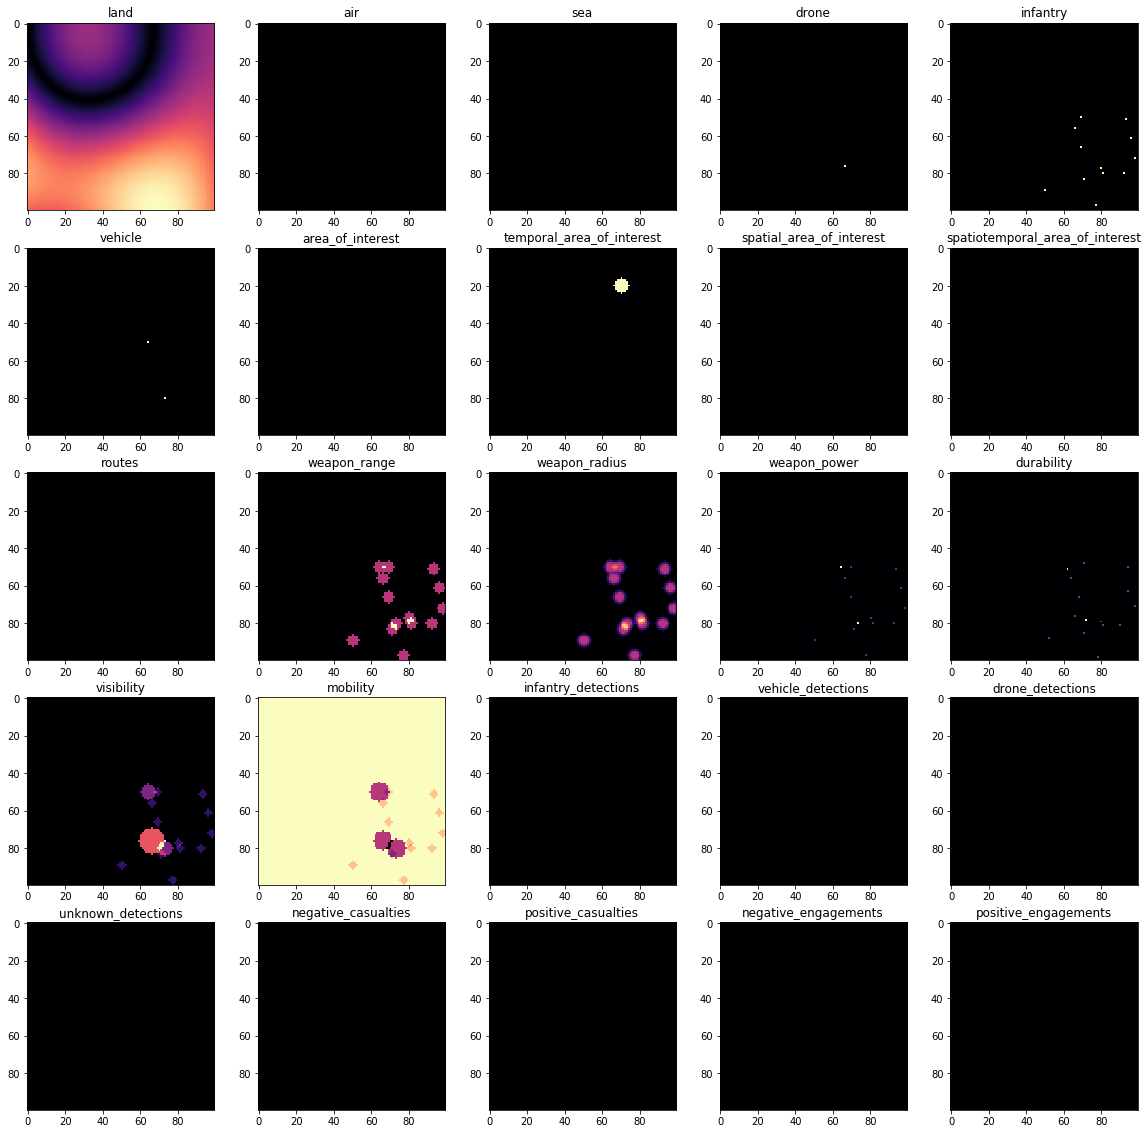

In [9]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

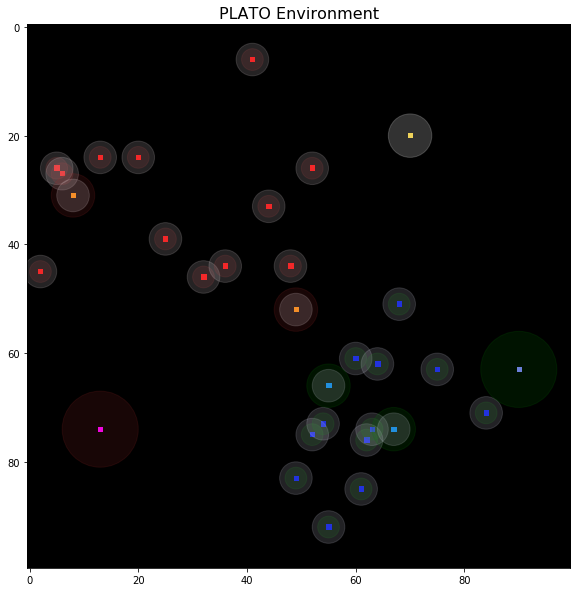

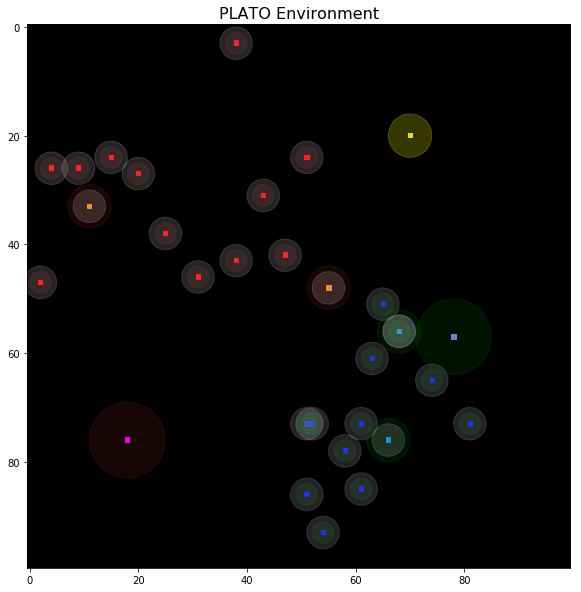

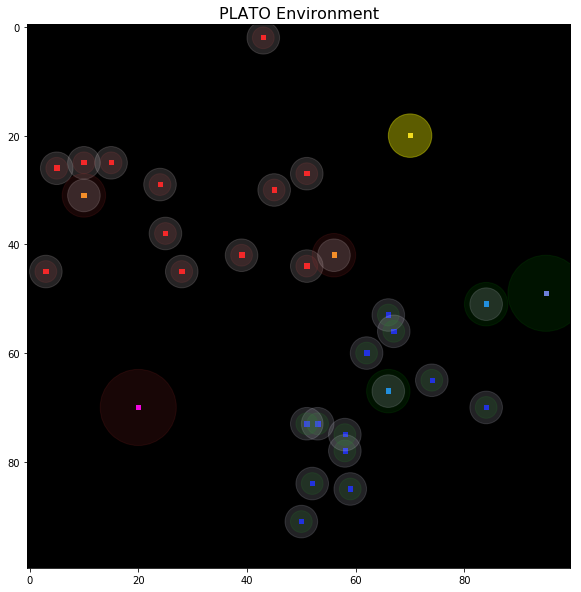

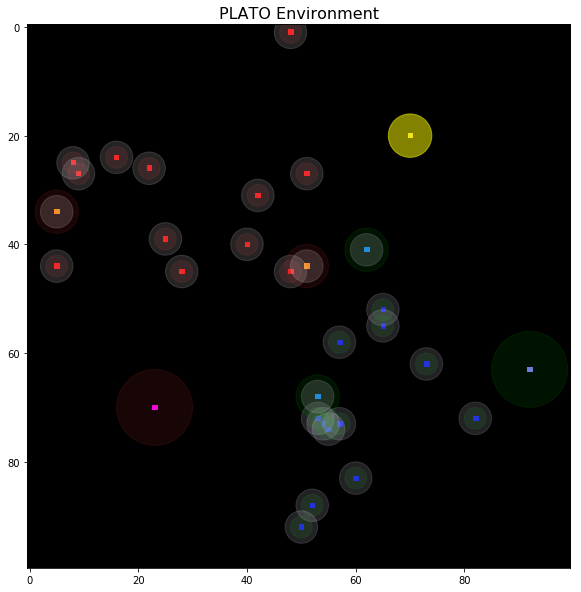

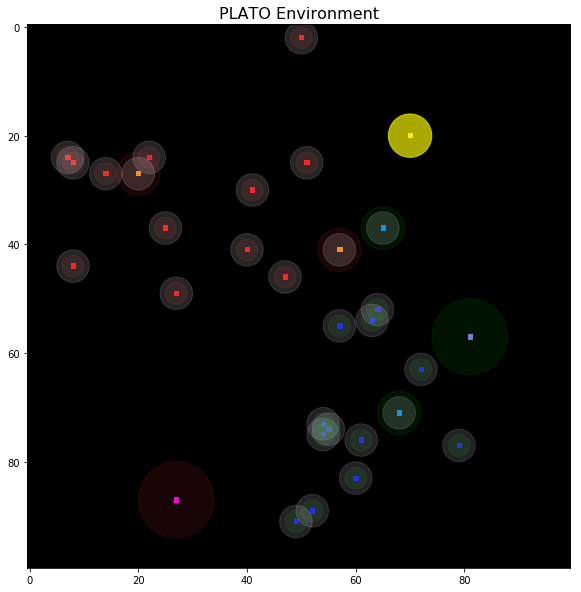

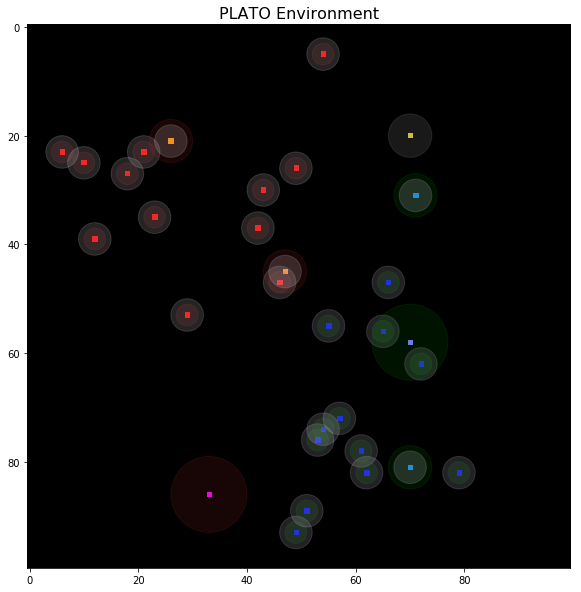

Black Kills:
White Kills:

Reward: 0


In [10]:
import tqdm
sim.reset()
bar = tqdm.tqdm_notebook(total=sim.time_limit)

terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metadata = sim.step(whites, blacks)
    state = sprime
    bar.update(1)
    
    if sim.timer % 16 == 0: sim.render()
           
print('Black Kills:')
for ent in metadata['positive_casualties']: print('\t',ent.id,ent)
print('White Kills:')
for ent in metadata['negative_casualties']: print('\t',ent.id,ent)

print('\nReward:', reward)